In [2]:
%pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 1.8 MB/s eta 0:00:00


In [4]:
%pip install pandas imbalanced-learn scikit-learn xgboost matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

In [4]:
pip install openpyxl


In [5]:
df = pd.read_excel("/content/Copper_Modelling_-_Cleaned_Dataset.xlsx")

In [9]:
df.head()

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_type_IPL,...,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,4.010077,30156308,28,1,10,1.098612,1500.0,21.236568,6.751101,False,...,False,False,True,False,1,4,2021,1,7,2021
1,6.645123,30202938,25,1,41,0.587787,1210.0,21.235312,6.954639,False,...,False,False,True,False,1,4,2021,1,4,2021
2,5.424027,30202938,25,1,41,0.916291,1265.0,21.235312,6.891626,False,...,False,False,True,False,1,4,2021,1,4,2021
3,4.249521,30341428,38,1,10,0.470004,1275.0,21.235312,7.218177,False,...,True,False,False,False,1,4,2021,1,7,2021
4,6.448299,30202938,25,1,41,0.916291,1165.0,21.235312,6.891626,False,...,False,False,True,False,1,4,2021,1,4,2021


In [6]:
df.dtypes

quantity_tons          float64
customer                 int64
country                  int64
status                   int64
application              int64
thickness              float64
width                  float64
product_ref            float64
selling_price          float64
item_type_IPL             bool
item_type_Others          bool
item_type_PL              bool
item_type_S               bool
item_type_SLAWR           bool
item_type_W               bool
item_type_WI              bool
item_date_day            int64
item_date_month          int64
item_date_year           int64
delivery_date_day        int64
delivery_date_month      int64
delivery_date_year       int64
dtype: object

In [7]:
df_1 = df.copy()

In [8]:
df_1['status'].value_counts()

status
1    116010
0     34438
Name: count, dtype: int64

In [9]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"


In [10]:
x = df_1.drop('status', axis = 1)
y = df_1['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)

In [11]:
x.shape, y.shape, x_new.shape, y_new.shape

((150448, 21), (150448,), (230312, 21), (230312,))

In [12]:
# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [13]:
algorithms = [DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]

for algorithm in algorithms:
  print("Before Over Sampling: ", machine_learning_classification(x, y, algorithm))
  print("After Over Sampling: ", machine_learning_classification(x_new, y_new, algorithm))
  print("")

Before Over Sampling:  {'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9505483549351944}
After Over Sampling:  {'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9661767579185029}

Before Over Sampling:  {'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9742439348620804}
After Over Sampling:  {'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9848685495951197}

Before Over Sampling:  {'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9707876370887338}
After Over Sampling:  {'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.9999945725621306, 'accuracy_test': 0.9831100883572499}

Before Over Sampling:  {'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8127253693148773, 'accuracy_test': 0.8142572283150549}
After Over Sampling:  {'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.771814229656606, 'accuracy_test': 0.772

In [ ]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [ ]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

In [ ]:
# refer parameter values: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [14]:
# note: This execution will take long time (avg: 1 hour 15 mins). Please wait be patient.

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# n_jobs = -1 means it uses the all processors in this process

In [16]:
# evaluate all the parameter combinations and return the best parameters based on score
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [17]:
grid_search.best_score_

0.9707135457245608

In [18]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9887706310482011, 0.9742743633719037)

In [ ]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [19]:
# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

[[23024   215]
 [  945 21879]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     23239
           1       0.99      0.96      0.97     22824

    accuracy                           0.97     46063
   macro avg       0.98      0.97      0.97     46063
weighted avg       0.98      0.97      0.97     46063



In [20]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9746722627699573


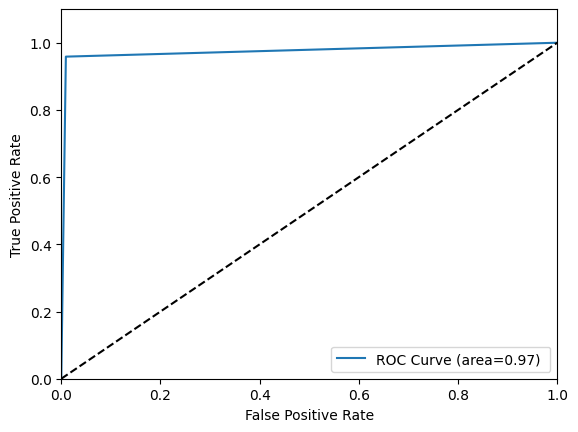

In [21]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [25]:
x_new.columns

Index(['quantity_tons', 'customer', 'country', 'application', 'thickness',
       'width', 'product_ref', 'selling_price', 'item_type_IPL',
       'item_type_Others', 'item_type_PL', 'item_type_S', 'item_type_SLAWR',
       'item_type_W', 'item_type_WI', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [42]:
import numpy as np
import warnings
# Filter out the specific warning
warnings.filterwarnings("ignore", message="X does not have valid feature names.*")

# will pass the user data manually to check the prediction of status ar our model

user_data = np.array([[5.1, 30197494, 32, 10, 1.39, 1010, 18.92, 6.91, False, False, True, True, False, True, False, 24, 3, 2021, 1, 4, 2021]])
y_predict = model.predict(user_data)
if y_predict[0] == 1:
    print('Won')
else:
    print('Lost')

Lost


In [43]:
user_data = np.array([[2.72, 30199048, 32, 59, 1.61, 1212, 13.37, 7.02, False, False, False, False, False, True, False, 1, 3, 2021, 1, 7, 2021]])
y_predict = model.predict(user_data)
if y_predict[0] == 1:
    print('Won')
else:
    print('Lost')

Won


In [35]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
# Note:
# google colab sklearn version is 1.2.2
# so if you save your model in pickle in colab and download to your system.
# after you load the model in your system for prediction measns ----> your system have same 1.2.2 version of sklearn
# otherwise it cannot load in your system and it shows error

In [36]:
# save the classification model by using pickle

import pickle

with open('Classification_Model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [37]:
# Now successfully saved our model in 'classification_model.pkl' pickle file.
# Hereafter you can load and using this pickle file only to predict the status.
# (don't need any packages - only need numpy for pass user input)

In [44]:
# load pickle model to predict the status (like Trained brain).

with open('/content/Classification_Model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[5.27, 30235401, 78, 10, 2.08, 1020, 13.37, 6.7, False, False, False, False, False, True, False, 18, 3, 2021, 1, 4, 2021]])
y_predict = model.predict(user_data)
if y_predict[0] == 1:
    print('Won')
else:
    print('Lost')

Won


In [45]:
user_data = np.array([[6.41, 30199179, 32, 27, 1.39, 1300, 18.92, 6.83, False, False, False, False, False, True, False, 18, 3, 2021, 1, 4, 2021]])
y_predict = model.predict(user_data)
if y_predict[0] == 1:
    print('Won')
else:
    print('Lost')

Won


# **Regression Method - Prdict Selling Price**

In [46]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [47]:
df

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_type_IPL,...,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,4.010077,30156308,28,1,10,1.098612,1500.0,21.236568,6.751101,False,...,False,False,True,False,1,4,2021,1,7,2021
1,6.645123,30202938,25,1,41,0.587787,1210.0,21.235312,6.954639,False,...,False,False,True,False,1,4,2021,1,4,2021
2,5.424027,30202938,25,1,41,0.916291,1265.0,21.235312,6.891626,False,...,False,False,True,False,1,4,2021,1,4,2021
3,4.249521,30341428,38,1,10,0.470004,1275.0,21.235312,7.218177,False,...,True,False,False,False,1,4,2021,1,7,2021
4,6.448299,30202938,25,1,41,0.916291,1165.0,21.235312,6.891626,False,...,False,False,True,False,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,4.639402,30200854,25,1,41,0.672944,1220.0,18.916240,6.383507,False,...,False,False,True,False,2,7,2020,1,8,2020
150444,5.342748,30200854,25,1,41,0.667829,1500.0,18.916240,6.380123,False,...,False,False,True,False,2,7,2020,1,8,2020
150445,1.655480,30200854,25,1,41,0.536493,1250.0,18.916240,6.429719,False,...,False,False,True,False,2,7,2020,1,8,2020
150446,3.431882,30200854,25,1,41,0.615186,1250.0,18.916240,6.400257,False,...,False,False,True,False,2,7,2020,1,8,2020


In [48]:
df.columns

Index(['quantity_tons', 'customer', 'country', 'status', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'item_type_IPL',
       'item_type_Others', 'item_type_PL', 'item_type_S', 'item_type_SLAWR',
       'item_type_W', 'item_type_WI', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [50]:
df_2 = df.copy()

In [59]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    x = df.drop(columns=['selling_price'], axis=1)
    y = df['selling_price']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [58]:
df_2['selling_price']

0         6.751101
1         6.954639
2         6.891626
3         7.218177
4         6.891626
            ...   
150443    6.383507
150444    6.380123
150445    6.429719
150446    6.400257
150447    6.410175
Name: selling_price, Length: 150448, dtype: float64

In [62]:
algorithms = [DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, XGBRegressor]

for algorithm in algorithms:
  print("Before Over Sampling: ", machine_learning_regression(df_2, algorithm))
  print("After Over Sampling: ", machine_learning_regression(df_2, algorithm))
  print("")

Before Over Sampling:  {'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999613906083955, 'R2_test': 0.9286328157539371}
After Over Sampling:  {'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999613906083955, 'R2_test': 0.9299267206758242}

Before Over Sampling:  {'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999613906083955, 'R2_test': 0.9567419780159095}
After Over Sampling:  {'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999613906083955, 'R2_test': 0.9564346723717885}

Before Over Sampling:  {'algorithm': 'RandomForestRegressor', 'R2_train': 0.9943540257284206, 'R2_test': 0.9595231263457772}
After Over Sampling:  {'algorithm': 'RandomForestRegressor', 'R2_train': 0.9943208772634321, 'R2_test': 0.9596984650452778}

Before Over Sampling:  {'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7373789733065069, 'R2_test': 0.739132321776321}
After Over Sampling:  {'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7407202501156135, 'R2_test': 0.7412338879889901}

Before Over S

In [63]:
# Among the above algorithms DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor performed well in scoring.

# Let us use RandomForestRegressor for our model

In [64]:
x = df_2.drop(columns=['selling_price'], axis=1)
y = df_2['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [67]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.9568369727508379)

In [69]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_2.drop(columns=['selling_price'], axis=1)
y = df_2['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9885177512635879, 0.9596168781725295)

In [70]:
# before hypertuning = 'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940176821065443, 'R2_test': 0.9572742394942817

# compare before and after hypertuning, reduced the overfitting in training

In [71]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_2.drop(columns=['selling_price'], axis=1)
y = df_2['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9595290654386869,
 'Mean Absolute Error': 0.03038337117902497,
 'Mean Squared Error': 0.0022966270228644676,
 'Root Mean Squared Error': 0.047923136613377756}

In [75]:
# manually passed the user input and predict the selling price

user_data = np.array([[3.16, 30272155, 28, 1, 41, 1.25, 1090, 18.92, False, False, False, True, False, False, False, 19, 4, 2021, 1, 5, 2021]])
y_predict = model.predict(user_data)
y_predict[0]

6.815471626647527

In [79]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
f"{np.exp(y_predict[0]):.2f}"

'911.85'

In [80]:
import sklearn
print(sklearn.__version__)

1.2.2


In [81]:
# Note:
# google colab sklearn version is 1.2.2
# so if you save your model in pickle in colab and download to your system.
# after you load the model in your system for prediction measns ----> your system have same 1.2.2 version of sklearn
# otherwise it cannot load in your system and it shows error

In [82]:
# save the regression model by using pickle

with open('Regression_Model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Now successfully saved our model in 'Regression_Model.pkl' pickle file.
# Hereafter we can load and use this pickle file to predict the selling price. 

In [83]:
# load the pickle model to predict selling price

with open('/content/Regression_Model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[6.19, 30202938, 25, 1, 42, 0.41, 1250, 21.24, False, False, False, False, False, True, False, 31, 4, 2021, 1, 4, 2021]]))
np.exp(y_pred[0])

970.4680340986652